In [35]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [221]:
df = pd.read_csv("results.csv")
df["threads"] = df["threads"].astype(str)
n_its = df["iterations"].max() + 1
df

,iterations,threads,time_in_ns,matrix_size,gmacs
0,0,1,2590000,150,1.303089
1,0,8,833000,150,4.051621
2,1,1,2591000,150,1.302586
3,1,8,837000,150,4.032258
4,2,1,2599000,150,1.298576
...,...,...,...,...,...
495,7,8,112863000,750,3.737939
496,8,1,488115000,750,0.864294
497,8,8,113117000,750,3.729546
498,9,1,482046000,750,0.875176


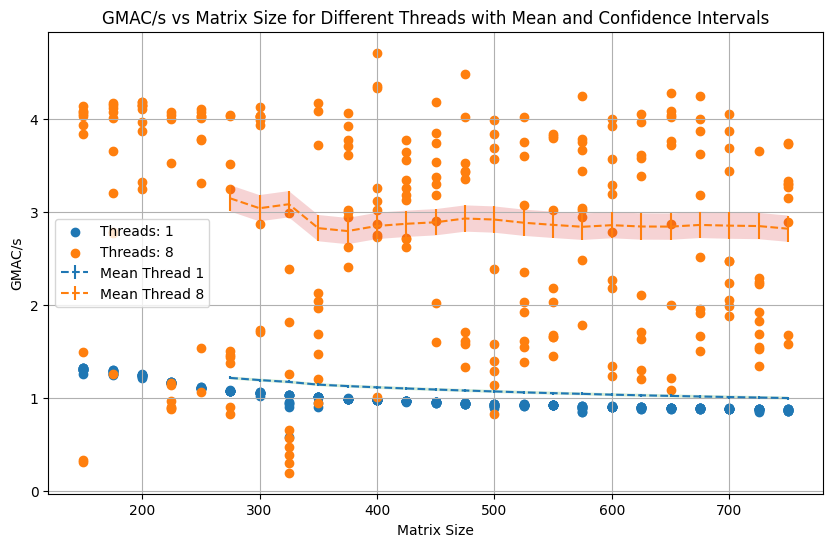

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


means = df.groupby('threads')['gmacs'].rolling(int(len(df)), min_periods=int(len(df)/10)).mean()
stds = df.groupby('threads')['gmacs'].std()
count = df.groupby('threads')['gmacs'].count()

threads = df['threads'].unique()
x = df['matrix_size'].unique()

plt.figure(figsize=(10, 6))

for thread in threads:
    thread_data = df[df['threads'] == thread]
    plt.scatter(thread_data['matrix_size'], thread_data['gmacs'], label=f'Threads: {thread}')

for i, thread in enumerate(threads):
    y = means[thread][::n_its]
    plt.errorbar(x, y, yerr=1.96 * stds[thread] / np.sqrt(count[thread]), label=f'Mean Thread {thread}', linestyle='dashed')

    # Fill the area between upper and lower confidence interval 
    plt.fill_between(x, y - 1.96 * stds[thread] / np.sqrt(count[thread]), y + 1.96 * stds[thread] / np.sqrt(count[thread]), alpha=0.2)

plt.xlabel('Matrix Size')
plt.ylabel('GMAC/s')
plt.title('GMAC/s vs Matrix Size for Different Threads with Mean and Confidence Intervals')
plt.legend()
plt.grid()
# plt.yscale('log') 
plt.show()

In [219]:
import pandas as pd
import plotly.graph_objects as go

means = df.groupby('threads')['gmacs'].rolling(int(len(df)), min_periods=int(len(df)/10)).mean()
stds = df.groupby('threads')['gmacs'].rolling(int(len(df)), min_periods=int(len(df)/10)).std()
count = df.groupby('threads')['gmacs'].count()

fig = go.Figure()

for thread in df['threads'].unique():
    thread_data = df[df['threads'] == thread]
    x = thread_data['matrix_size']
    y_mean = means[thread]
    y_err = 1.96 * stds[thread] / (count[thread] ** 0.5)

    # Create upper and lower bounds for confidence intervals
    upper_bound = (y_mean + y_err).tolist()
    lower_bound = (y_mean - y_err).tolist()

    # Add mean line and a single filled confidence interval for each thread
    fig.add_trace(go.Scatter(x=x, y=y_mean, mode='lines', line=dict(dash='dash'), name=f'Mean Thread {thread}'))
    fig.add_trace(go.Scatter(x=x.tolist() + x.tolist()[::-1],
                             y=upper_bound + lower_bound[::-1],
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(0,0,0,0)'),
                             name=f'CI Thread {thread}'))

    # Adding scatter plot for each thread
    fig.add_trace(go.Scatter(x=thread_data['matrix_size'], y=thread_data['gmacs'], mode='markers', name=f'Thread {thread}'))

fig.update_layout(
    xaxis_title='Matrix Size', 
    yaxis_title='GMACS', 
    title='GMACS vs Matrix Size for Different Threads',)

fig.show()